In [2]:
import json
import os
from sentence_transformers import SentenceTransformer, util
import torch


folder_data_base = 'datasource'
filename_origin = 'goscv_log_20221216_merged.json'
filename_target = 'goscv_log_20221216_merged_embedded.json'
path_file_origin = os.path.join(folder_data_base, filename_origin)
path_file_target = os.path.join(folder_data_base, filename_target)


with open(path_file_origin, 'r') as file:
    dict_osname_contents = json.load(file)
# end


embedder = SentenceTransformer('distilbert-base-uncased')

for osname, contents in dict_osname_contents.items():
    for content in contents:
        if 'processed_log' in content:
            processed_log = content['processed_log']
            if processed_log:
                embedded_log = embedder.encode(processed_log)
                content['embedded_log'] = embedded_log
            # end
        # end
    # end
# end

In [5]:
for osname, contents in dict_osname_contents.items():
    for content in contents:
        if 'processed_log' in content:
            processed_log = content['processed_log']
            if processed_log:
                for id, value in enumerate(content['embedded_log']):
                    content['embedded_log'][id] = float(value)
                # end
            # end
        # end
    # end
# end

In [6]:
with open(path_file_target, 'w+') as file:
    file.write(json.dumps(dict_osname_contents))
# end

In [14]:
# from sklearn.decomposition import PCA
# from sklearn.manifold import TSNE
# import numpy as np

In [15]:
# pca = PCA(n_components=100)
# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=2000)

# embeddings_pca = pca.fit_transform(embeddings)
# matrix_embeddings_pca = np.array(embeddings_pca)
# # matrix_embeddings_pca = np.array(corpus_embeddings)
# matrix_embeddings_pca_tsne = tsne.fit_transform(matrix_embeddings_pca)

<AxesSubplot:>

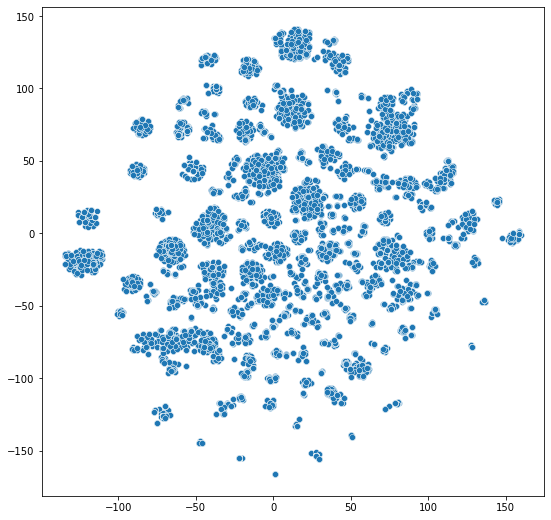

In [16]:
# %matplotlib inline
# import matplotlib.pyplot as plt
# import seaborn as sns


# plt.figure(figsize=(9,9))
# sns.scatterplot(
#     x=matrix_embeddings_pca_tsne[:,0],
#     y=matrix_embeddings_pca_tsne[:,1],
#     data=matrix_embeddings_pca_tsne,
#     legend="full",
#     alpha=1
# )